In [15]:
#ノック５１

import pandas as pd

# 工場データの読み込み
factories = pd.read_csv("data/tbl_factory.csv", index_col=0)
factories

# 倉庫データの読み込み
warehouses = pd.read_csv("data/tbl_warehouse.csv", index_col=0)
warehouses

# コストテーブル
cost = pd.read_csv("data/rel_cost.csv", index_col=0)
cost.head()

# 輸送トランザクションテーブル
trans = pd.read_csv("data/tbl_transaction.csv", index_col=0)
trans.head()

# トランザクションテーブルに各テーブルをジョインする
# コストデータを付与
join_data = pd.merge(trans, cost, left_on=["ToFC","FromWH"], right_on=["FCID","WHID"], how="left")
join_data.head()

# 工場情報を付与
join_data = pd.merge(join_data, factories, left_on="ToFC", right_on="FCID", how="left")
join_data.head()

# 倉庫情報を付与
join_data = pd.merge(join_data, warehouses, left_on="FromWH", right_on="WHID", how="left")
# カラムの並び替え
join_data = join_data[["TransactionDate","Quantity","Cost","ToFC","FCName","FCDemand","FromWH","WHName","WHSupply","WHRegion"]]
join_data.head()

# 関東データを抽出
kanto = join_data.loc[join_data["WHRegion"]=="関東"]
kanto.head()

# 東北データを抽出
tohoku = join_data.loc[join_data["WHRegion"]=="東北"]
tohoku.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
1,2019-01-01 06:12:42,19,1.3,FC00007,那須工場,25,WH00006,山形倉庫,65,東北
2,2019-01-01 06:32:32,31,0.9,FC00006,山形工場,30,WH00004,郡山倉庫,60,東北
5,2019-01-01 08:56:09,31,0.3,FC00005,仙台工場,21,WH00005,仙台倉庫,72,東北
6,2019-01-01 09:00:15,33,0.7,FC00006,山形工場,30,WH00006,山形倉庫,65,東北
9,2019-01-01 14:12:51,21,0.7,FC00006,山形工場,30,WH00006,山形倉庫,65,東北


In [16]:
#ノック５２

# 支社のコスト合計を算出
print("関東支社の総コスト: " + str(kanto["Cost"].sum()) + "万円")
print("東北支社の総コスト: " + str(tohoku["Cost"].sum()) + "万円")

# 支社の総輸送個数
print("関東支社の総部品輸送個数: " + str(kanto["Quantity"].sum()) + "個")
print("東北支社の総部品輸送個数: " + str(tohoku["Quantity"].sum()) + "個")

# 部品一つ当たりの輸送コスト
tmp = (kanto["Cost"].sum() / kanto["Quantity"].sum()) * 10000
print("関東支社の部品１つ当たりの輸送コスト: " + str(int(tmp)) + "円")
tmp = (tohoku["Cost"].sum() / tohoku["Quantity"].sum()) * 10000
print("東北支社の部品１つ当たりの輸送コスト: " + str(int(tmp)) + "円")

# コストテーブルを支社ごとに集計
cost_chk = pd.merge(cost, factories, on="FCID", how="left")
# 平均
print("東京支社の平均輸送コスト：" + str(cost_chk["Cost"].loc[cost_chk["FCRegion"]=="関東"].mean()) + "万円")
print("東北支社の平均輸送コスト：" + str(cost_chk["Cost"].loc[cost_chk["FCRegion"]=="東北"].mean()) + "万円")

関東支社の総コスト: 2189.3万円
東北支社の総コスト: 2062.0万円
関東支社の総部品輸送個数: 49146個
東北支社の総部品輸送個数: 50214個
関東支社の部品１つ当たりの輸送コスト: 445円
東北支社の部品１つ当たりの輸送コスト: 410円
東京支社の平均輸送コスト：1.075万円
東北支社の平均輸送コスト：1.05万円


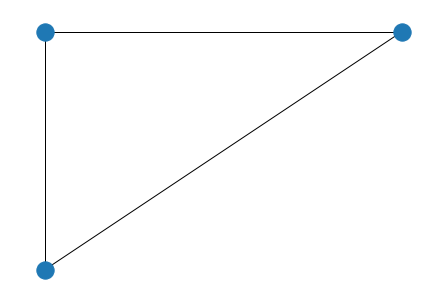

In [19]:
#ノック５３

import networkx as nx
import matplotlib.pyplot as plt

#グラフオブジェクトの作成
G = nx.Graph()

#頂点の設定
G.add_node("nodeA")
G.add_node("nodeB")
G.add_node("nodeC")

#辺の設定
G.add_edge("nodeA", "nodeB")
G.add_edge("nodeA", "nodeC")
G.add_edge("nodeB", "nodeC")

#座標の設定
pos={}

pos["nodeA"]=(0,0)
pos["nodeB"]=(1,1)
pos["nodeC"]=(0,1)

#描画
nx.draw(G,pos)

#表示
plt.show()

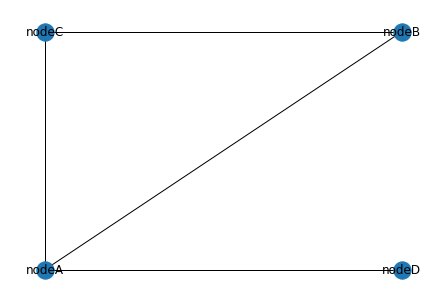

In [20]:
#ノック５４

G.add_node("nodeD")
G.add_edge("nodeA", "nodeD")
pos["nodeD"]=(1,0)
nx.draw(G, pos, with_labels=True)